In [6]:
%pip install wordcloud 

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [15]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aaqui\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
data = pd.read_csv("./data/labelled_aia_reviews.csv")

In [26]:
data.head()

,Unnamed: 0.1,Unnamed: 0,reviews,dates,names,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,"""AIA with his Vitality program is such a good ...",2024-05-28,William (NSW),0.257,0.000,0.743,0.7650,Positive
1,1,1,"""Purchased a policy via a broker 22 years ago,...",2024-05-22,Vlad (VIC),0.161,0.107,0.732,0.4939,Positive
2,2,2,"""Seamless experience setting up my Life Cover ...",2024-05-22,KIN (VIC),0.054,0.046,0.900,0.1007,Positive
3,3,3,"""Policy has just sat there. I've never made a ...",2024-05-09,Trent (NSW),0.102,0.189,0.709,-0.5957,Negative
4,4,4,"""They seem to be okay but we haven't made a cl...",2024-04-29,Karlie (QLD),0.139,0.000,0.861,0.1154,Positive


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  220 non-null    int64  
 1   Unnamed: 0    220 non-null    int64  
 2   reviews       220 non-null    object 
 3   dates         220 non-null    object 
 4   names         220 non-null    object 
 5   Positive      220 non-null    float64
 6   Negative      220 non-null    float64
 7   Neutral       220 non-null    float64
 8   Compound      220 non-null    float64
 9   Sentiment     220 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 17.3+ KB


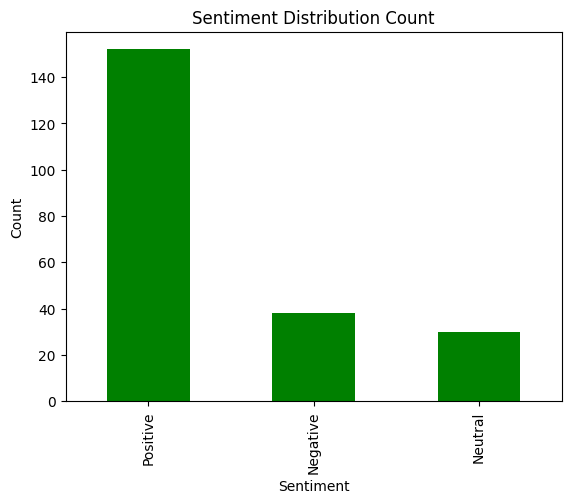

In [28]:
#Bar plot to visualize the total counts of each rating
data["Sentiment"].value_counts().plot.bar(color = "green")
plt.title("Sentiment Distribution Count")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


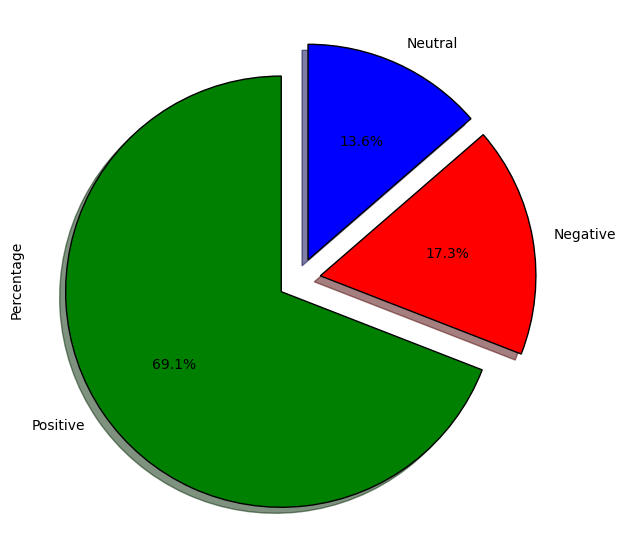

In [29]:
fig = plt.figure(figsize=(7,7))
colors = ('green','red', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['Sentiment'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label="Percentage")
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

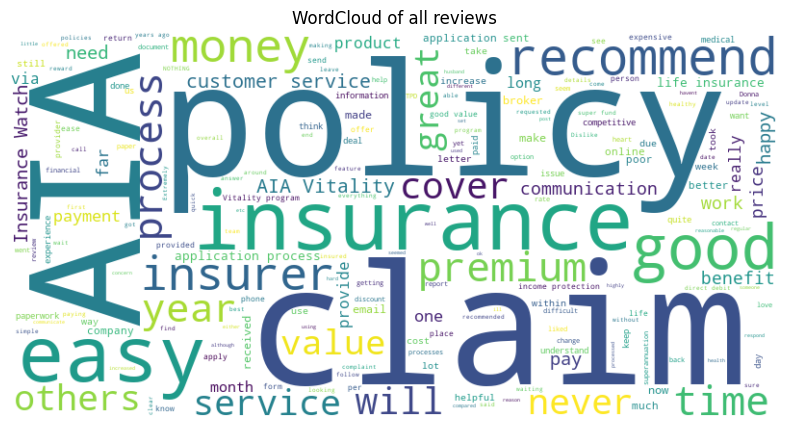

In [32]:
#Combine all reviews in a review list
reviews_list = [review for review in data['reviews']]

#Use join to combine all reviews into a single string
reviews_string = " ".join(reviews_list)

#Creating a wordcloud of all reviews
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(reviews_string)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of all reviews')
plt.show()

In [35]:
#Store all negative reviews in a list
neg_reviews = []
for i in range(len(data)):
    if data["Sentiment"][i] == "Negative":
        neg_reviews.append(data["reviews"][i])
#Combine all negative reviews into a string
neg_reviews_string = " ".join(neg_reviews)

#Store all positive reviews in a list
pos_reviews = []
for j in range(len(data)):
    if data["Sentiment"][j] == "Positive":
        pos_reviews.append(data["reviews"][j])
#Combine all positive reviews into a string
pos_reviews_string = " ".join(pos_reviews)

#Store all neutral reviews in a list
neutral_reviews = []
for k in range(len(data)):
    if data["Sentiment"][k] == "Neutral":
        neutral_reviews.append(data["reviews"][k])
#Combine all neutral reviews in a string
neutral_reviews_string = " ".join(neutral_reviews)



In [36]:
#Split negative reviews string into individual words
neg_words = neg_reviews_string.lower().split()
#Split positive reviews string into individual words
pos_words = pos_reviews_string.lower().split()
#Split neutral reviews string into individual words
neutral_words = neutral_reviews_string.lower().split()

#Create an empty list to store unique negative words
unique_negative = []
for word in neg_words:
    if word not in pos_words and neutral_words:
        unique_negative.append(word)
#Combine all unique negative words in a single string
unique_negative_string = " ".join(unique_negative)

#Create an empty list to unique positive words
unique_positive = []
for word in pos_words:
    if word not in neg_words and neutral_words:
        unique_positive.append(word)
#Combine all unique positive words in a single string
unique_positive_string = " ".join(unique_positive)

#Create an empty list to store unique neutral words
unique_neutral = []
for word in neutral_words:
    if word not in pos_words and neg_words:
        unique_neutral.append(word)
#Combine all unique neutral words in a single string
unique_neutral_string = " ".join(unique_neutral)

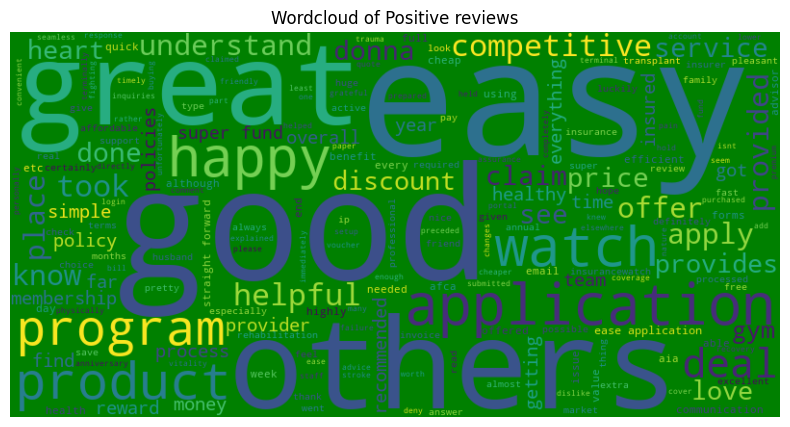

In [41]:
#Creating a wordcloud of positive reviews
wordcloud = WordCloud(width=800, height=400, background_color="green").generate(unique_positive_string)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Positive reviews")
plt.show()

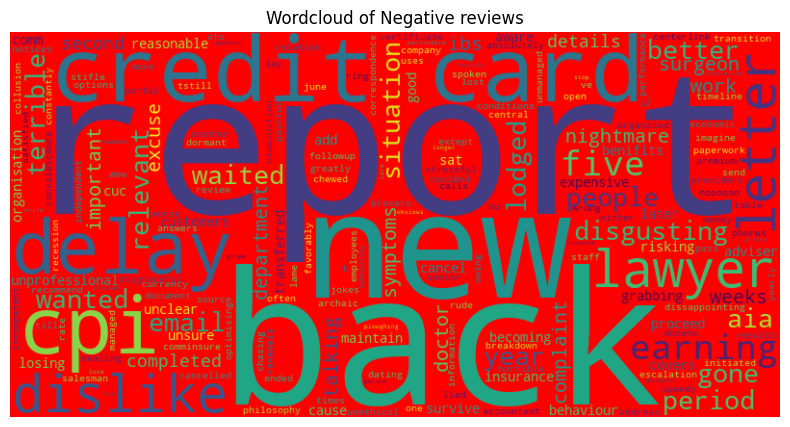

In [42]:
#Creating a wordcloud of negative reviews
wordcloud = WordCloud(width=800, height=400, background_color="red").generate(unique_negative_string)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Negative reviews")
plt.show()

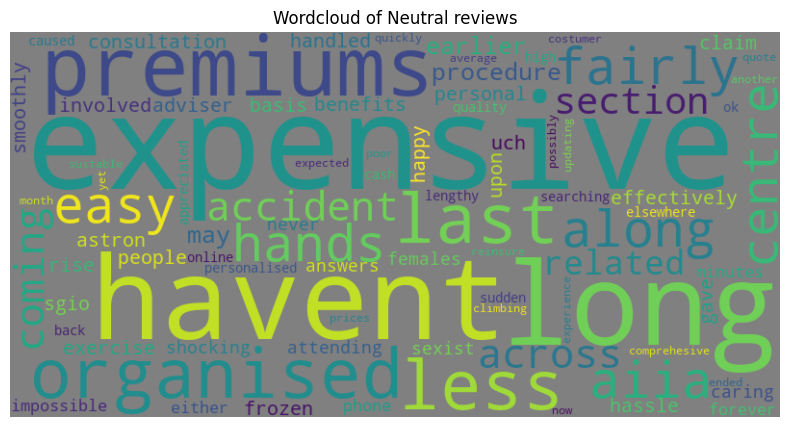

In [43]:
#Creating a wordcloud of neutral reviews
wordcloud = WordCloud(width=800, height=400, background_color="grey").generate(unique_neutral_string)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Neutral reviews")
plt.show()